# <span style="color:blue">[</span> lab-12-5-rnn_stock_prediction  <span style="color:blue">]</span>
<p>출처: <a href="http://hunkim.github.io/ml/" title="모두를 위한 머신러닝과 딥러닝의 강의" target="blank">모두를 위한 머신러닝과 딥러닝의 강의</a></p> <br/>
> [Tensorflow Document(Tensor Transformations)](https://www.tensorflow.org/api_guides/python/array_ops)  <br/>
> [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/)

In [2]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import os
# silence INFO logs set it to 1
# filter out WARNING set it to 2 
# silence ERROR logs (not recommended) set it to 3
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np
import matplotlib
import os


# if "DISPLAY" not in os.environ:
#     # remove Travis CI Error
#     matplotlib.use('Agg')

import matplotlib.pyplot as plt

# Desc.

In [3]:
def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# Desc.

In [4]:
# reproducibility
tf.set_random_seed(777)  


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []

for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.17630454  0.19950862  0.19569456  0.13703505  0.21100727]] -> [ 0.21004549]
[[ 0.15914044  0.15505392  0.15833981  0.15188671  0.1507653 ]
 [ 0.14439481  0.14262498  0.15191345  0.12876221  0.14706388]
 [ 0.14631816  0.16644215  0.16561709  0.1554002   0.17725764]
 [ 0.17365262  0.17060429  0.1788511   0.21949449  0.18171679]
 [ 0.18125864  0.17806158  0.18437358  0.40337008  0.18597188]
 [ 0.17630454  0.19950862  0.19569456  0.13703505  0.21100727]
 [ 0.20556236  0.22160877  0.21553094  0.19711392  0.21004549]] -> [ 0.2509354]
[[ 0.14439481  0.14262498  0.15191345  0.12876221  0.14706388]
 [ 0.14631816  0.16644215  0.16561709  0.1554002   0.17725764]
 [ 0.17365262  0.17060429  0.1788511   0.21949449  0.18171679]
 [ 0.18125864  0.17806158  0.18437358  0.40337008  0.18597188]
 [ 0.17630454  0.19950862  0.19569456  0.13703505  0.21100727]
 [ 0.20556236  0.22160877  0.21553094  0.19711392  0.21004549]
 [ 0.20576639  0.24274924  0.22788476  0.17579995  0.2509354 ]] -> [ 0.24321202]
[[

[[ 0.23709328  0.23587006  0.23313731  0.12884288  0.22068331]
 [ 0.21174031  0.21948135  0.22230949  0.10491171  0.22595834]
 [ 0.22846744  0.23484403  0.24924714  0.1016223   0.24111364]
 [ 0.24522365  0.24575533  0.25493987  0.10815631  0.24714657]
 [ 0.23240154  0.22919326  0.22354185  0.17060142  0.20748066]
 [ 0.20666975  0.22517547  0.20520202  0.17772699  0.23301139]
 [ 0.22301788  0.21826745  0.20980893  0.22558932  0.19914528]] -> [ 0.1513773]
[[ 0.21174031  0.21948135  0.22230949  0.10491171  0.22595834]
 [ 0.22846744  0.23484403  0.24924714  0.1016223   0.24111364]
 [ 0.24522365  0.24575533  0.25493987  0.10815631  0.24714657]
 [ 0.23240154  0.22919326  0.22354185  0.17060142  0.20748066]
 [ 0.20666975  0.22517547  0.20520202  0.17772699  0.23301139]
 [ 0.22301788  0.21826745  0.20980893  0.22558932  0.19914528]
 [ 0.18379392  0.19988436  0.16576382  0.27552209  0.1513773 ]] -> [ 0.11850205]
[[ 0.22846744  0.23484403  0.24924714  0.1016223   0.24111364]
 [ 0.24522365  0.245

 [ 0.09660332  0.10967421  0.11602579  0.14366765  0.10430872]] -> [ 0.07609668]
[[ 0.10639469  0.11955947  0.12039798  0.12406561  0.13045145]
 [ 0.10592847  0.10669713  0.10775088  0.22924621  0.09533209]
 [ 0.09465072  0.10123422  0.10631306  0.20806668  0.10034491]
 [ 0.08010929  0.1104547   0.09665887  0.16701622  0.11896849]
 [ 0.11198978  0.11664006  0.11150688  0.15275612  0.0976636 ]
 [ 0.09660332  0.10967421  0.11602579  0.14366765  0.10430872]
 [ 0.08410171  0.09400814  0.0912596   0.17805862  0.07609668]] -> [ 0.06193242]
[[ 0.10592847  0.10669713  0.10775088  0.22924621  0.09533209]
 [ 0.09465072  0.10123422  0.10631306  0.20806668  0.10034491]
 [ 0.08010929  0.1104547   0.09665887  0.16701622  0.11896849]
 [ 0.11198978  0.11664006  0.11150688  0.15275612  0.0976636 ]
 [ 0.09660332  0.10967421  0.11602579  0.14366765  0.10430872]
 [ 0.08410171  0.09400814  0.0912596   0.17805862  0.07609668]
 [ 0.08185786  0.07839993  0.07544322  0.25145648  0.06193242]] -> [ 0.00827705]
[

 [ 0.12752213  0.13898311  0.14598599  0.14675988  0.13587239]] -> [ 0.11028333]
[[ 0.10948375  0.12265225  0.1232738   0.11799767  0.12886303]
 [ 0.12656046  0.13502316  0.14214199  0.11606167  0.12960614]
 [ 0.12743474  0.13837616  0.14912581  0.10492068  0.14298359]
 [ 0.13515704  0.13288424  0.14064544  0.13891727  0.14056467]
 [ 0.13882896  0.13386711  0.14598599  0.12561621  0.13832038]
 [ 0.12752213  0.13898311  0.14598599  0.14675988  0.13587239]
 [ 0.12122754  0.12022427  0.11893681  0.23269696  0.11028333]] -> [ 0.11652032]
[[ 0.12656046  0.13502316  0.14214199  0.11606167  0.12960614]
 [ 0.12743474  0.13837616  0.14912581  0.10492068  0.14298359]
 [ 0.13515704  0.13288424  0.14064544  0.13891727  0.14056467]
 [ 0.13882896  0.13386711  0.14598599  0.12561621  0.13832038]
 [ 0.12752213  0.13898311  0.14598599  0.14675988  0.13587239]
 [ 0.12122754  0.12022427  0.11893681  0.23269696  0.11028333]
 [ 0.09922599  0.1120155   0.10464033  0.20712557  0.11652032]] -> [ 0.12022156]
[

 [ 0.64532342  0.65887386  0.66911973  0.17489468  0.67206604]] -> [ 0.6283201]
[[ 0.77459354  0.7863987   0.79151251  0.13875594  0.79872799]
 [ 0.80096621  0.79174606  0.7681256   0.18128529  0.76177277]
 [ 0.76742476  0.75773171  0.77012096  0.13635386  0.75810053]
 [ 0.7597898   0.76443166  0.76877108  0.27360402  0.77695713]
 [ 0.67504739  0.69410795  0.66330954  0.5327597   0.65930074]
 [ 0.64532342  0.65887386  0.66911973  0.17489468  0.67206604]
 [ 0.67248296  0.66418064  0.63225214  0.24528995  0.6283201 ]] -> [ 0.6216169]
[[ 0.80096621  0.79174606  0.7681256   0.18128529  0.76177277]
 [ 0.76742476  0.75773171  0.77012096  0.13635386  0.75810053]
 [ 0.7597898   0.76443166  0.76877108  0.27360402  0.77695713]
 [ 0.67504739  0.69410795  0.66330954  0.5327597   0.65930074]
 [ 0.64532342  0.65887386  0.66911973  0.17489468  0.67206604]
 [ 0.67248296  0.66418064  0.63225214  0.24528995  0.6283201 ]
 [ 0.6196501   0.6156622   0.6009687   0.27701891  0.6216169 ]] -> [ 0.57842471]
[[ 

# Desc.

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# Desc.

In [6]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# We use the last cell's output
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  

# Cost/loss

In [7]:
# sum of the squares
loss = tf.reduce_sum(tf.square(Y_pred - Y))  

# Optimizer

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE

In [9]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

# Desc.

In [10]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    print("test_predict: {}".format(test_predict))

[step: 0] loss: 83.71253967285156
[step: 1] loss: 40.165775299072266
[step: 2] loss: 14.836172103881836
[step: 3] loss: 4.347232818603516
[step: 4] loss: 4.673377990722656
[step: 5] loss: 10.14285659790039
[step: 6] loss: 14.430898666381836
[step: 7] loss: 14.795208930969238
[step: 8] loss: 12.097990036010742
[step: 9] loss: 8.227912902832031
[step: 10] loss: 4.7237653732299805
[step: 11] loss: 2.4249749183654785
[step: 12] loss: 1.5312607288360596
[step: 13] loss: 1.793663501739502
[step: 14] loss: 2.7270965576171875
[step: 15] loss: 3.8031864166259766
[step: 16] loss: 4.60298490524292
[step: 17] loss: 4.900707721710205
[step: 18] loss: 4.6666083335876465
[step: 19] loss: 4.016658306121826
[step: 20] loss: 3.145742177963257
[step: 21] loss: 2.265700340270996
[step: 22] loss: 1.5562689304351807
[step: 23] loss: 1.1312131881713867
[step: 24] loss: 1.0211440324783325
[step: 25] loss: 1.1748929023742676
[step: 26] loss: 1.4803634881973267
[step: 27] loss: 1.8013252019882202
[step: 28] los

[step: 237] loss: 0.7677851915359497
[step: 238] loss: 0.7668699622154236
[step: 239] loss: 0.76595538854599
[step: 240] loss: 0.7650415897369385
[step: 241] loss: 0.7641282677650452
[step: 242] loss: 0.7632154822349548
[step: 243] loss: 0.7623032927513123
[step: 244] loss: 0.7613915205001831
[step: 245] loss: 0.7604806423187256
[step: 246] loss: 0.7595705389976501
[step: 247] loss: 0.7586607336997986
[step: 248] loss: 0.7577518224716187
[step: 249] loss: 0.7568434476852417
[step: 250] loss: 0.7559357285499573
[step: 251] loss: 0.7550287246704102
[step: 252] loss: 0.7541224956512451
[step: 253] loss: 0.7532168030738831
[step: 254] loss: 0.7523118257522583
[step: 255] loss: 0.75140780210495
[step: 256] loss: 0.7505042552947998
[step: 257] loss: 0.749601423740387
[step: 258] loss: 0.748699426651001
[step: 259] loss: 0.7477983236312866
[step: 260] loss: 0.7468980550765991
[step: 261] loss: 0.745998203754425
[step: 262] loss: 0.7450993061065674
[step: 263] loss: 0.744201123714447
[step: 26

[step: 460] loss: 0.5932646989822388
[step: 461] loss: 0.5926544666290283
[step: 462] loss: 0.5920454859733582
[step: 463] loss: 0.5914384722709656
[step: 464] loss: 0.5908326506614685
[step: 465] loss: 0.5902284979820251
[step: 466] loss: 0.5896257758140564
[step: 467] loss: 0.5890247225761414
[step: 468] loss: 0.5884252190589905
[step: 469] loss: 0.5878269672393799
[step: 470] loss: 0.5872303247451782
[step: 471] loss: 0.5866354703903198
[step: 472] loss: 0.5860418677330017
[step: 473] loss: 0.5854498147964478
[step: 474] loss: 0.5848592519760132
[step: 475] loss: 0.5842700600624084
[step: 476] loss: 0.5836825966835022
[step: 477] loss: 0.5830965638160706
[step: 478] loss: 0.582511842250824
[step: 479] loss: 0.5819287300109863
[step: 480] loss: 0.5813474059104919
[step: 481] loss: 0.5807670950889587
[step: 482] loss: 0.5801883935928345
[step: 483] loss: 0.57961106300354
[step: 484] loss: 0.5790355801582336
[step: 485] loss: 0.5784612894058228
[step: 486] loss: 0.5778884887695312
[ste

# Plot predictions

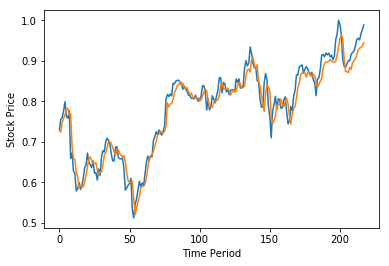

In [11]:
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()